In [1]:
import numpy as np
import pennylane as qml

a = 0.25
b = 0.75

# matrix to be decomposed
A = np.array(
    [[a,  0, 0,  b],
     [0, -a, b,  0],
     [0,  b, a,  0],
     [b,  0, 0, -a]]
)

LCU = qml.pauli_decompose(A)

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU.coeffs}")
print(f"Unitaries:\n {LCU.ops}")


LCU decomposition:
   (0.25) [I0 Z1]
+ (0.75) [X0 X1]
Coefficients:
 [0.25 0.75]
Unitaries:
 [Identity(wires=[0]) @ PauliZ(wires=[1]), PauliX(wires=[0]) @ PauliX(wires=[1])]


In [6]:
type(LCU.ops[0])

pennylane.operation.Tensor

In [2]:
dev1 = qml.device("default.qubit", wires=1)

# normalized square roots of coefficients
alphas = (np.sqrt(LCU.coeffs) / np.linalg.norm(np.sqrt(LCU.coeffs)))


@qml.qnode(dev1)
def prep_circuit():
    qml.StatePrep(alphas, wires=0)
    return qml.state()

print("Target state: ", alphas)
print("Output state: ", np.real(prep_circuit()))

Target state:  [0.5       0.8660254]
Output state:  [0.5       0.8660254]


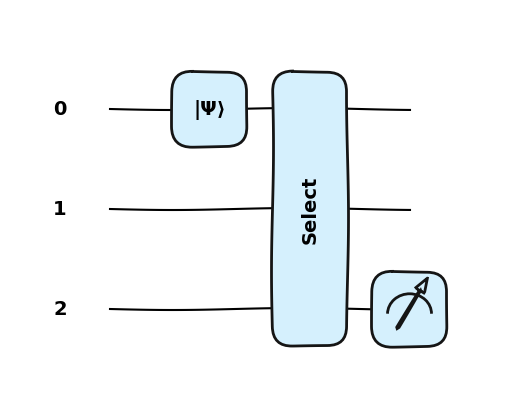

In [3]:
import matplotlib.pyplot as plt

dev2 = qml.device("default.qubit", wires=3)

# unitaries
ops = LCU.ops
# relabeling wires: 0 → 1, and 1 → 2
unitaries = [qml.map_wires(op, {0: 1, 1: 2}) for op in ops]


@qml.qnode(dev2)
def sel_circuit(qubit_value):
    qml.BasisState(qubit_value, wires=0)
    qml.Select(unitaries, control=0)
    return qml.expval(qml.PauliZ(2))

qml.draw_mpl(sel_circuit, style='pennylane')([0])
plt.show()